# PID Control Example: Heating Element Temperature Regulation

In this example, we simulate a heating system controlled by a PID controller.

The system:

- A heating element that increases temperature.
- Natural cooling towards ambient temperature.
- Goal: Maintain target temperature by adjusting heater power.

Let's start by importing necessary packages.


In [3]:
import time
import matplotlib.pyplot as plt
from py_pidx import PID


## Thermal System Model

We define a simple thermal system with these assumptions:

- Heating power directly increases temperature at a rate proportional to power.
- Cooling is proportional to the temperature difference with ambient.
- Temperature updates every time step.

This model abstracts many real-world effects but is good enough for PID demonstration.


In [4]:
class ThermalSystem:
    def __init__(self, ambient_temp=25.0, heating_rate=10.0, cooling_rate=0.1, initial_temp=25.0):
        self.ambient = ambient_temp
        self.heating_rate = heating_rate
        self.cooling_rate = cooling_rate
        self.temp = initial_temp

    def update(self, heater_power_pct, dt):
        heat_in = (heater_power_pct / 100.0) * self.heating_rate
        heat_out = self.cooling_rate * (self.temp - self.ambient)
        dtemp = (heat_in - heat_out) * dt
        self.temp += dtemp
        return self.temp


## PID Controller Initialization

We set PID gains (Kp, Ki, Kd), sample time, output limits (heater power 0-100%), and initial setpoint.

Next, create an instance of our thermal system.


In [5]:
pid = PID(
    Kp=3.0,
    Ki=0.5,
    Kd=0.1,
    sample_time=0.1,
    output_limits=(0, 100),  # heater power % bounds
    auto_mode=True,
)

setpoint = 70.0  # Target temperature in °C
pid.setpoint = setpoint

thermal_system = ThermalSystem(
    ambient_temp=25.0,
    heating_rate=10.0,
    cooling_rate=0.05,
    initial_temp=25.0,
)


## Simulation Loop

We run a loop simulating the system over time:

- At each step, measure temperature.
- Compute PID output (heater power).
- Update temperature using heater power.
- Store results for plotting.


In [6]:
duration = 100.0  # total simulation time in seconds
dt = 0.1  # time step
steps = int(duration / dt)

times = []
temps = []
heater_powers = []

for i in range(steps):
    current_temp = thermal_system.temp
    power_output = pid.run(current_temp, delta_time=dt)
    thermal_system.update(power_output, dt)

    times.append(i * dt)
    temps.append(current_temp)
    heater_powers.append(power_output)


## Results Visualization

Let's plot:

- Temperature over time.
- Setpoint.
- Heater power output.

This helps us evaluate the PID controller performance.


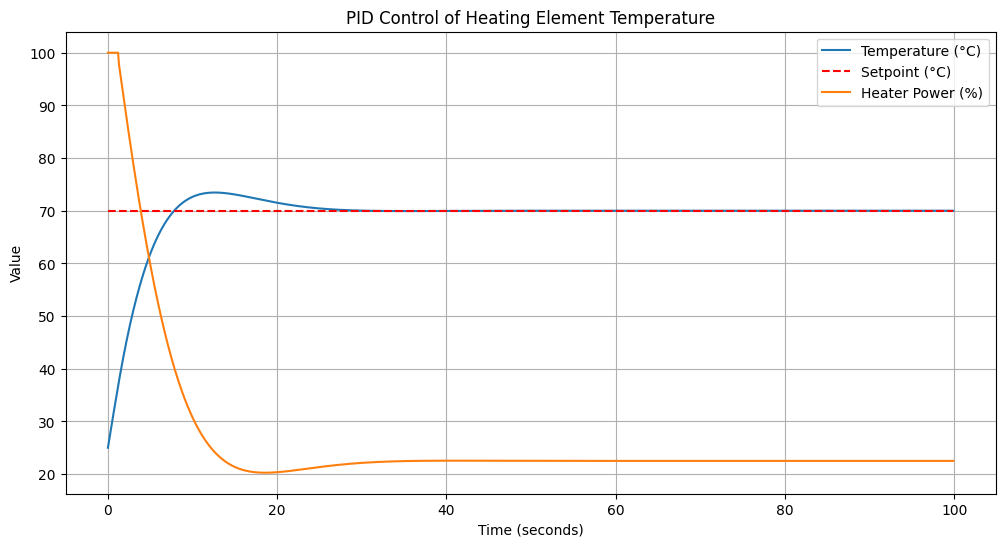

In [7]:
plt.figure(figsize=(12,6))
plt.plot(times, temps, label='Temperature (°C)')
plt.plot(times, [setpoint]*len(times), 'r--', label='Setpoint (°C)')
plt.plot(times, heater_powers, label='Heater Power (%)')
plt.xlabel('Time (seconds)')
plt.ylabel('Value')
plt.title('PID Control of Heating Element Temperature')
plt.legend()
plt.grid(True)
plt.show()


## Enhancing Control with Feedforward

Feedforward anticipates the needed heater power based on setpoint.

We can add a simple feedforward term proportional to setpoint.


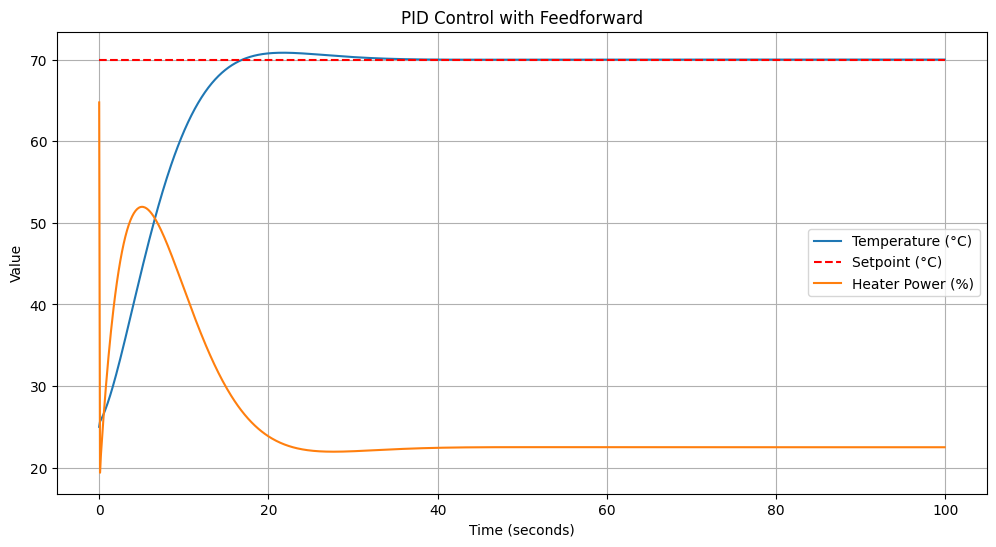

In [10]:
feedforward_gain = 0.7  # simple scaling factor

pid.feedforward = feedforward_gain * setpoint

# Re-run simulation with feedforward enabled

thermal_system.temp = 25.0  # reset initial temp
times = []
temps = []
heater_powers = []

for i in range(steps):
    current_temp = thermal_system.temp
    power_output = pid.run(current_temp, delta_time=dt)
    thermal_system.update(power_output, dt)

    times.append(i * dt)
    temps.append(current_temp)
    heater_powers.append(power_output)

plt.figure(figsize=(12,6))
plt.plot(times, temps, label='Temperature (°C)')
plt.plot(times, [setpoint]*len(times), 'r--', label='Setpoint (°C)')
plt.plot(times, heater_powers, label='Heater Power (%)')
plt.xlabel('Time (seconds)')
plt.ylabel('Value')
plt.title('PID Control with Feedforward')
plt.legend()
plt.grid(True)
plt.show()
